#### 결정트리 알고리즘 기반 모델
 - 데이터셋의 피쳐 (특성)을 기준으로 데이터를 분류하는 알고리즘
 - 질문방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨
 - 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향 X, 쉬운 알고리즘
 - 단점 : 과대작업 ==> 해결을 위한 많은 하이퍼 파라미터 존재!
 - 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==> 단, 여러 개의 DT가 모이면 성능 강해짐
    * 앙상블에 주로 사용됨.

[1] 모듈 로딩 및 데이터 준비

In [2]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (150, 4), 2D
targetSR : (150,), 1D


[2] 학습용 데이터셋 준비

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [6]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D      y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D      y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D      y_train : (112,), 1D
X_test : (38, 4), 2D      y_test : (38,), 1D


[3] 학습 - 기본 학습

In [7]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [8]:
# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3
[dt_model.max_features] 4
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[dt_model.feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


# 성능 체크

In [9]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)
# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(X_test, y_test)

In [10]:
print(f'train_score : test_score = {train_score} : {test_score}')

train_score : test_score = 1.0 : 1.0


In [11]:
# 데이터 부족, cross_validate ....

[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [12]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [13]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5 [기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result =cross_validate(dt_model2, X_train, y_train,
               return_train_score=True,
               return_estimator=True)

In [14]:
# dict => DataFrame
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.003014,0.002522,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.003008,0.001002,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.001508,0.001016,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.002015,0.002006,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.001508,0.001015,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼파라미터 설정
 - 단점 : 과대적합
    * max_depth, min_samples_leaf, .... ==> 많음
    

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
#  하이퍼 파라미터  dit 생성
params = {'max_depth':[4,3,2,1],
       'min_samples_leaf' : [5,3,2]}

In [1]:
gscv =(DecisionTreeClassifier(), param_grid=params, refit=True)
gscv.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [18]:
# 모델 파라미터
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

[gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9371541501976285
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


- 주요 피쳐 시각화

In [19]:
# 가장 좋은 모델
best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[best_model.max_depth] : 4
[best_model.min_samples_leaf] : 2


In [20]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.07164651, 0.91513476]), 4)

In [49]:
best_model.n_features_in_

4

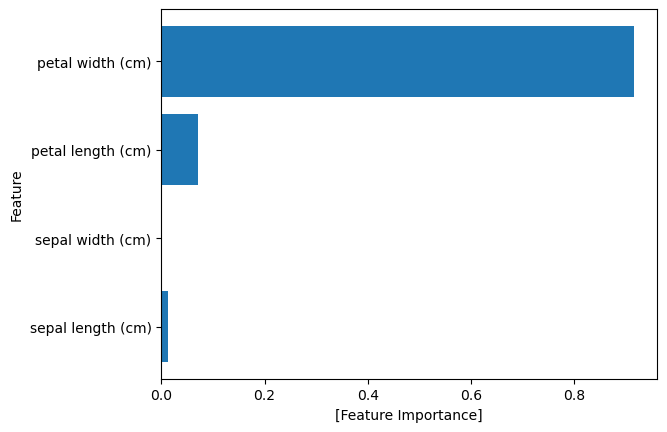

In [21]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align = 'center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()

- DT 그래프 시각화
    -  Graphviz 프로그램(OS에 맞는 버전) 설치 + Python용 패키지 graphviz 설치

In [47]:
# [1] DT 모델을 dot 포멧의 파일로 저장 ==> export_graphviz()

from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file = 'tree.dot', class_names = ['setosa', 'versicolor','verginia'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True, rotate=True)

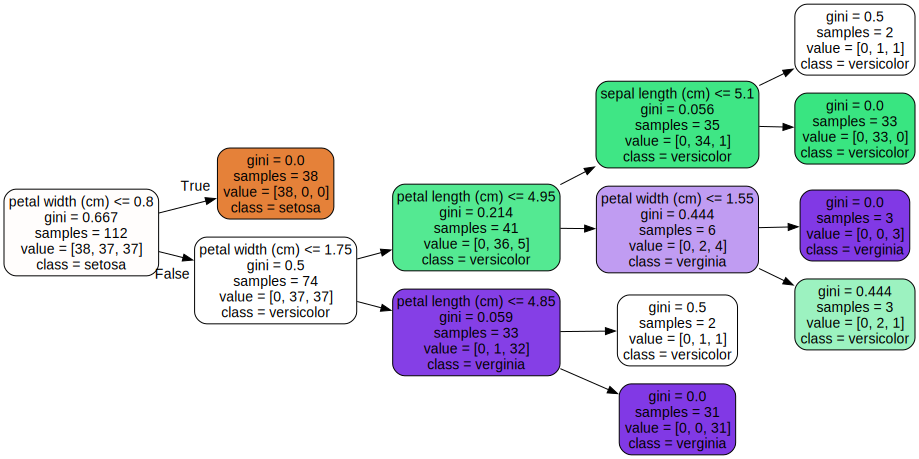

In [48]:
# (2) dot 파일 출력
import graphviz

# 파일에서 데이터 읽어오기

with open('tree.dot') as f:
    dot_data = f.read()

graphviz.Source(dot_data)


[6]  새로운 데이터 예측)2
new_data - feadDtx 0  X_trom